<a href="https://colab.research.google.com/github/Aiden-Liang/CS-Books/blob/master/Deep_Learning_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with MNIST

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# total data = 785 
image_pixels = 28 * 28           # each images size = 28*28 
classify_labels = 10             # classify 0 ~ 9 number
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
test_data = np.loadtxt("mnist_test.csv", delimiter=",")

print("(first column is classified label)")
print("------------------------------------")
print("[train data](size):", train_data.shape)
print(train_data)
print("------------------------------------")
print("[test data](size):", test_data.shape)
print(test_data)


(first column is classified label)
------------------------------------
[train data](size): (60000, 785)
[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]]
------------------------------------
[test data](size): (10000, 785)
[[7. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]]


# Normorlization (feature scaling) 

In [0]:
# MNIST dataset are greyscale and the pixels range between 0 and 255
# Normorlization (feature Scaling) 
fscal = 0.99 / 255      # scaling range / real range

# map these values into an interval from [0.01, 1] 
# we avoid 0 values as inputs, which are capable of preventing weight updates
train_image = np.asfarray(train_data[:, 1:]) * fscal + 0.01    # scaling and map the values range
test_image = np.asfarray(test_data[:, 1:]) * fscal + 0.01      

# first column is classified label
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

# One-hot encoding representation

In [0]:
# indepentdent labels in ranges 0 ~ 9
lbr = np.arange(classify_labels)             # produce a set of 0-9 arrays
print("[lbr]:",lbr)
print("------------------------------------------------")

# Turning a label into one-hot representation can be achieved 
for label in range(10):
    one_hot = (lbr==label).astype(np.int)    # transfer digital to binary
    print("label :", label, " one-hot representation :", one_hot)

# transform labels into one hot representation
train_labels_one_hot = (lbr==train_labels).astype(np.float)
test_labels_one_hot = (lbr==test_labels).astype(np.float)

# turn our labelled images into one-hot representations 
# instead of 0 and 1, we create 0.01 and 0.99, which will be better for our calculations
train_labels_one_hot[train_labels_one_hot== 0] = 0.01
train_labels_one_hot[train_labels_one_hot== 1] = 0.99
test_labels_one_hot[test_labels_one_hot== 0] = 0.01
test_labels_one_hot[test_labels_one_hot== 1] = 0.99


[lbr]: [0 1 2 3 4 5 6 7 8 9]
------------------------------------------------
label : 0  one-hot representation : [1 0 0 0 0 0 0 0 0 0]
label : 1  one-hot representation : [0 1 0 0 0 0 0 0 0 0]
label : 2  one-hot representation : [0 0 1 0 0 0 0 0 0 0]
label : 3  one-hot representation : [0 0 0 1 0 0 0 0 0 0]
label : 4  one-hot representation : [0 0 0 0 1 0 0 0 0 0]
label : 5  one-hot representation : [0 0 0 0 0 1 0 0 0 0]
label : 6  one-hot representation : [0 0 0 0 0 0 1 0 0 0]
label : 7  one-hot representation : [0 0 0 0 0 0 0 1 0 0]
label : 8  one-hot representation : [0 0 0 0 0 0 0 0 1 0]
label : 9  one-hot representation : [0 0 0 0 0 0 0 0 0 1]


[train_labels]
 [[5.]
 [0.]
 [4.]
 [1.]
 [9.]]
image:


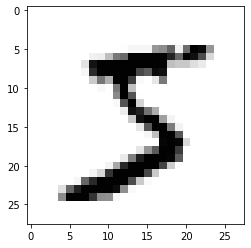

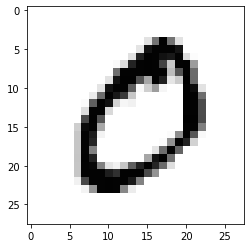

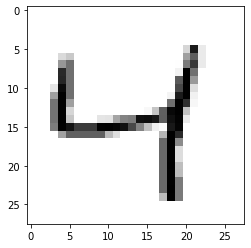

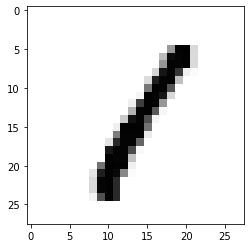

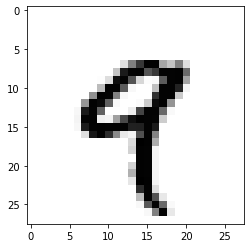

In [0]:
# check the label and image
print("[train_labels]\n",train_labels[:5,:])
print("image:")
for i in range(5):
    imag = train_image[i].reshape((28,28))  # i is rows   
    plt.imshow(imag, cmap="Greys")
    plt.show()

In [0]:
# input = image , output = label 
x_train = train_image
print("x_train:" ,x_train.shape)

# bias = bias/np.amax(bias, axis = 0)
bias = np.random.randn(x_train.shape[0], 1)
x_train = np.hstack((x_train, bias)) 
y_train = train_labels_one_hot
print("y_train:" ,y_train.shape)
print("bias:", bias.shape)
print("x_merge_bias:",x_train.shape)
print(x_train)

print("------------------------------------")
x_test = test_image
print("x_test:" ,x_test.shape)
y_test = test_labels_one_hot
print("y_test:" ,y_test.shape)


x_train: (60000, 784)
y_train: (60000, 10)
bias: (60000, 1)
x_merge_bias: (60000, 785)
[[ 0.01        0.01        0.01       ...  0.01        0.01
  -0.87876448]
 [ 0.01        0.01        0.01       ...  0.01        0.01
  -0.13758098]
 [ 0.01        0.01        0.01       ...  0.01        0.01
  -0.50846918]
 ...
 [ 0.01        0.01        0.01       ...  0.01        0.01
  -0.58108702]
 [ 0.01        0.01        0.01       ...  0.01        0.01
   0.56310624]
 [ 0.01        0.01        0.01       ...  0.01        0.01
  -0.70724077]]
------------------------------------
x_test: (10000, 784)
y_test: (10000, 10)


# Define a Neural Network (one hidden layer)

In [0]:
hidden_neuron = 800       # hidden neuron size

class NeuralNetwork(object):
    def __init__(self):     # initial property
        
        self.alpha = 0.01    # learning rate
        
        # dimesion
        self.inputSize = 785            # input +1 (bias)
        self.hiddenSize = hidden_neuron      
        self.outputSize = 10
        
        # weights (Gaussion Random)
        self.w1 = np.random.randn(self.inputSize, self.hiddenSize)   # from input to hidden layer [785*1000]
        self.w2 = np.random.randn(self.hiddenSize +1, self.outputSize)  # from hidden to output layer [1001*10]
        
    def feed_forware(self, x_train):
        self.z = np.dot(x_train, self.w1)              # forware pass matrix dot
        self.sz = self.sigmoid(self.z)                 # activation function between input and hidden
        
        self.h_sz = np.hstack((self.sz, bias))         # after activation hidden layer input
        self.z2 = np.dot(self.h_sz, self.w2)       
        
        output = self.sigmoid(self.z2)                 # activation function between hidden and output
        return output
        
    def sigmoid(self, s):    # define sigmoid function
        return 1/(1 + np.exp(-s))
    
    def backware_pass(self, x_train, y_train, output):
        self.output_error = (y_train - output)                         # error in output
        self.output_delta = self.output_error * self.deriv_sigmoid(output)
        
        self.sz_error = np.dot(self.output_delta, self.w2.T)           # from output back to hidden layer 
        self.sz_delta = self.sz_error * self.deriv_sigmoid(self.h_sz)
        self.sz_delta_no_bias = np.delete(self.sz_delta, -1, axis=1)
        
        # weight update
        self.w1 += self.alpha * np.dot(x_train.T, self.sz_delta_no_bias)  # adjusting first weight set {input to hidden}
        
        self.w2 += self.alpha * np.dot(self.h_sz.T, self.output_delta)   # adjusting second weight set {hidden to output}
        self.last_w1 = self.w1     # storage the last weight
        self.last_w2 = self.w2     
    
    def deriv_sigmoid(self, ds):   # define sigmoid function derivative
        return ds * (1-ds)
    
    def train(self, x_train, y_train):
        fp_output = self.feed_forware(x_train)
        self.backware_pass(x_train, y_train, fp_output)

# Training Neural Network and Plot

Forward pass output size: (60000, 10)
log(feed_forware(x_train)) [[-7.66125860e+00 -1.38049572e-11 -2.28089174e+01 ... -1.26085726e+01
  -2.04896815e+01 -3.07312559e+01]
 [-1.37377945e+01 -2.57430250e+00 -3.01559206e+01 ... -1.50635415e+01
  -2.82712778e-04 -2.17748047e+01]
 [-2.12038634e-04 -9.45566508e-06 -4.82542547e+00 ... -1.94716125e+01
  -1.37961429e+01 -3.84140740e+01]
 ...
 [-6.25364180e+00 -4.08941233e-05 -1.81394515e+01 ... -7.05742450e+00
  -1.52577682e+01 -3.20462862e+01]
 [-9.99284550e+00 -1.39468033e-04 -2.07249947e+01 ... -3.12230707e-02
  -7.29612637e+00 -3.02259259e+01]
 [-2.24834117e+00 -1.31285598e-06 -1.10359836e+01 ... -2.44490099e+00
  -1.25879523e+01 -1.86963238e+01]]
y_train output size: (60000, 10)
y.shape[1]: 10
# Every_epoch_Loss: 
loss : inf
# Input_x_train:
 [[ 0.01        0.01        0.01       ...  0.01        0.01
  -0.87876448]
 [ 0.01        0.01        0.01       ...  0.01        0.01
  -0.13758098]
 [ 0.01        0.01        0.01       ...  0.01    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


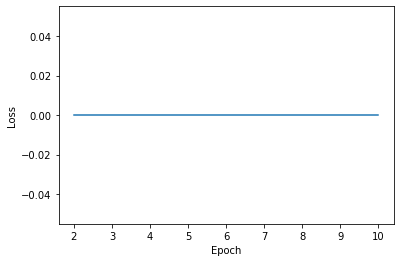

In [0]:
def compute_loss(x, y):
    # compute loss function using cross-entropy loss
    L_sum = np.sum(np.multiply(y, np.log(x)))
    m = y.shape[1]           # columns number of y
    L = -(1./m+1) * L_sum
    return L

# build a neural network objection
NN = NeuralNetwork()   
print("Forward pass output size:", NN.feed_forware(x_train).shape)
print("log(feed_forware(x_train))", np.log(NN.feed_forware(x_train)))
print("y_train output size:", y_train.shape)
print("y.shape[1]:",y_train.shape[1])

epoch = 10            # epoch 1000 times to train
loss_array = np.zeros((1,10))
epoch_plot = np.array([1,2,3,4,5,6,7,8,9,10])

print("# Every_epoch_Loss: ")
k = 0
                    
#for i in range(epoch): 
    #if (i % 1 == 0):     # every epoch 100 times print each "Loss"
        #print("Loss(%): " + str(Categorical_CE(NN.feed_forware(x_train), y_train))   # cross entropy
#loss_array[0,k] = compute_loss( NN.feed_forware(x_train), y_train )    
        #k = k + 1
NN.train(x_train, y_train)
loss_array[0,k] = compute_loss( NN.feed_forware(x_train).T, y_train.T ) 
print("loss :", loss_array[0,k] )
              

print("# Input_x_train:\n " + str(x_train))
print("# Idea_y_train:\n" + str(y_train))
print("----------------------------------------")
print("# Loss array:\n " + str(loss_array[0,:]))

# plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epoch_plot, loss_array[0,:])
plt.show()

# Valid the Model

In [0]:
print('# Last_tran_w1:\n', NN.last_w1)
print('# Last_tran_w2:\n', NN.last_w2)
valid_A1 = np.dot(x_valid, NN.last_w1)
valid_G1 = NN.sigmoid(valid_A1)
valid_A2 = np.dot(valid_G1, NN.last_w2)
valid_G2 = NN.sigmoid(valid_A2)
print("-------------------------------------------")
print("# valid_Loss(%): " + str(100*(np.mean(np.square( y_valid - NN.feed_forware(x_valid))))))
print("-------------------------------------------")
deviation = np.abs(y_valid-valid_G2/y_valid)*100
print('# Valid Deviation (%):\n', deviation)   # deviation [num_data x3]


each_valid_set = np.array([0, 1, 2, 3, 4, 5, 6])

# plot
plt.xlabel('Each valid input')
plt.ylabel('Valid output')
plt.plot(each_valid_set, y_valid, label = "Actual output")
plt.plot(each_valid_set, valid_G2, label = "Prediction output")
plt.legend()
plt.show()

plt.xlabel('Each valid input')
plt.ylabel('Valid Deviation (%)')
plt.plot(each_valid_set, deviation)
plt.show()

# Last_tran_w1:
 [[ 0.90351421 -0.01847468 -1.13228291 ... -1.01269003  0.98161271
  -0.90568178]
 [ 0.31304099  1.84098195  0.19936873 ...  0.7756495  -0.50905264
   0.46525257]
 [ 0.30127124 -1.28123941 -0.51047485 ... -0.15563512 -0.14977382
   0.16328811]
 ...
 [ 0.56705413  0.31477441  1.29605578 ... -0.88363726 -0.28661389
  -1.14022258]
 [-0.33610129 -0.99604108  0.25686444 ... -0.4750123   0.53972137
  -0.19289761]
 [ 1.13416002  0.00740743 -0.48679193 ...  0.56935509  0.21764342
   0.89375264]]
# Last_tran_w2:
 [[ 1.91679889 -0.57153987 -0.85888827 ... -1.47208881 -0.8707553
   0.09719131]
 [-3.529897   -1.94452474 -1.24875543 ... -4.8307859  -3.88604092
  -2.354579  ]
 [-3.08592613 -1.50852046 -2.20541614 ... -3.8692572  -0.62407711
  -2.66778918]
 ...
 [-5.84885127 -3.70288773 -0.18913996 ... -5.68042088 -3.07739359
  -4.17656987]
 [-3.54334325 -2.59484993  1.98764778 ... -3.9867822  -3.91238532
  -3.41799102]
 [ 0.38374798  0.43232552 -0.90771489 ... -1.41480053 -1.43184601

NameError: name 'x_valid' is not defined

In [0]:
q = np.array(([1,2],[3,4]))
p = np.array(([5,6],[7,8]))
d = q * p
print(q)
print("------------")
print(p)
print("------------")
print(d)
print("------------")
s = np.multiply(q,p)
print(s)